In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import re
import string
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("tweets.csv")

print("Data shape:", data.shape)
data.head()

Data shape: (11370, 5)


,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [19]:
data = data[['text', 'target']]

print(data.isnull().sum())
data.dropna(inplace=True)

text      0
target    0
dtype: int64


In [20]:
def clean_text(text):
    
    text = text.lower()
    
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
   
    text = re.sub(r'@\w+|#', '', text)
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = re.sub(r'\d+', '', text)
    
    text = text.strip()
    return text

data['text'] = data['text'].apply(clean_text)

In [27]:
x = data['text']
y = data['target']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

x_train_tfidf = tfidf.fit_transform(X_train)
x_val_tfidf = tfidf.transform(X_val)

In [34]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
print(f'Training Accuracy : {round(lr.score(x_train_tfidf, y_train), 2)*100} %')
print(f'Test Accuracy : {round(lr.score(x_val_tfidf, y_val), 2)*100} %')

Training Accuracy : 89.0 %
Test Accuracy : 86.0 %


In [52]:
y_pred = lr.predict(x_val_tfidf)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.862796833773087

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1851
           1       0.84      0.32      0.47       423

    accuracy                           0.86      2274
   macro avg       0.85      0.65      0.69      2274
weighted avg       0.86      0.86      0.84      2274



In [53]:
y_val_pred = lr.predict(x_val_tfidf)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.862796833773087

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1851
           1       0.84      0.32      0.47       423

    accuracy                           0.86      2274
   macro avg       0.85      0.65      0.69      2274
weighted avg       0.86      0.86      0.84      2274



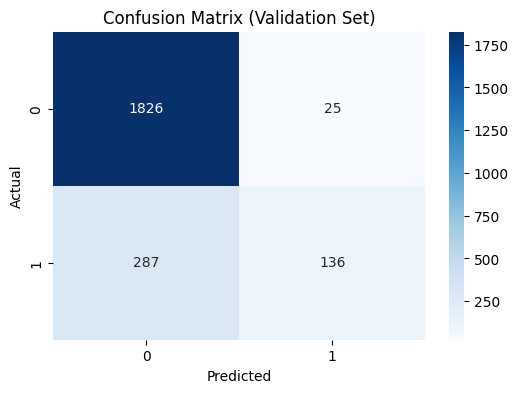

In [55]:
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation Set)")
plt.show()
